# Setup: Generate Sample Dataset

This cell creates the required folder structure (`data/raw/` and `data/processed/`) relative to the notebook, and generates the sample CSV dataset with missing values. 
This ensures the dataset is ready for cleaning functions and saves it to `data/raw/sample_data.csv`.

In [1]:
import os
import pandas as pd
import numpy as np

# Define folder paths relative to this notebook
raw_dir = '../data/raw'
processed_dir = '../data/processed'

# Create folders if they don't exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# Define the sample data
data = {
    'age': [34, 45, 29, 50, 38, np.nan, 41],
    'income': [55000, np.nan, 42000, 58000, np.nan, np.nan, 49000],
    'score': [0.82, 0.91, np.nan, 0.76, 0.88, 0.65, 0.79],
    'zipcode': ['90210', '10001', '60614', '94103', '73301', '12345', '94105'],
    'city': ['Beverly', 'New York', 'Chicago', 'SF', 'Austin', 'Unknown', 'San Francisco'],
    'extra_data': [np.nan, 42, np.nan, np.nan, np.nan, 5, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV in raw data folder
csv_path = os.path.join(raw_dir, 'sample_data.csv')
if not os.path.exists(csv_path):
    df.to_csv(csv_path, index=False)
    print(f'Sample dataset created and saved to {csv_path}')
else:
    print(f'File already exists at {csv_path}. Skipping CSV creation to avoid overwrite.')


Sample dataset created and saved to ../data/raw/sample_data.csv


# Homework Starter — Stage 6: Data Preprocessing
Use this notebook to apply your cleaning functions and save processed data.

In [1]:
import pandas as pd
from pathlib import Path
import sys
PARENT_DIR = Path('..').resolve()
if str(PARENT_DIR) not in sys.path:
    sys.path.insert(0, str(PARENT_DIR))
from src import cleaning

## Load Raw Dataset

In [2]:
df = pd.read_csv('../data/raw/sample_data.csv')
# df.head()
df

,age,income,score,zipcode,city,extra_data
0,34.0,55000.0,0.82,90210,Beverly,NaN
1,45.0,NaN,0.91,10001,New York,42.0
2,29.0,42000.0,NaN,60614,Chicago,NaN
3,50.0,58000.0,0.76,94103,SF,NaN
4,38.0,NaN,0.88,73301,Austin,NaN
5,NaN,NaN,0.65,12345,Unknown,5.0
6,41.0,49000.0,0.79,94105,San Francisco,NaN


## Inspect Missingness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         6 non-null      float64
 1   income      4 non-null      float64
 2   score       6 non-null      float64
 3   zipcode     7 non-null      int64  
 4   city        7 non-null      object 
 5   extra_data  2 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.0+ bytes


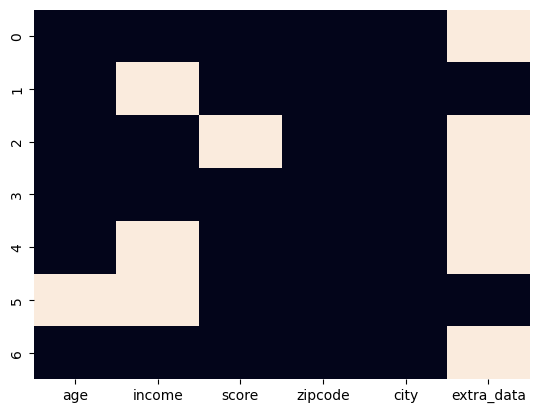

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Basic info and missing counts
df.info()
df.isna().sum()

# Heatmap for missing data
sns.heatmap(df.isnull(), cbar=False)
plt.show()


## Apply Cleaning Functions

In [10]:
df = cleaning.drop_missing(df, columns='age')
df = cleaning.fill_missing_median(df, ['income','score'])
df = cleaning.normalize_data(df, ['income','score'])

In [11]:
df

,age,income,score,zipcode,city,extra_data
0,34.0,0.8125,0.4,90210,Beverly,NaN
1,45.0,0.6250,1.0,10001,New York,42.0
2,29.0,0.0000,0.4,60614,Chicago,NaN
3,50.0,1.0000,0.0,94103,SF,NaN
4,38.0,0.6250,0.8,73301,Austin,NaN
6,41.0,0.4375,0.2,94105,San Francisco,NaN


## Save Cleaned Dataset

In [12]:
df.to_csv('../data/processed/sample_data_cleaned.csv', index=False)